[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/15_graph_theory/maximum_flow.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy
import networkx as nx

In [2]:
def dictconvert(dict_i, n):
    """Convert a dictionary into matrix

    Args:
        dict_i (dict): dictionary
        n (int): number of nodes

    Returns:
        scipy.sparse.csr.csr_matrix: matrix
    """
    
    origins = []
    destinations = []
    weights = []
    
    for i in range(6):
        try:
            innerdict = dict_i[i]
            for j in range(6):
                try:
                    weights.append(innerdict[j])
                    origins.append(i)
                    destinations.append(j)
                except:
                    continue
        except:
            continue
            
    sparsemat = scipy.sparse.csr_matrix((weights, (origins,destinations)), shape=(n,n))
    
    return sparsemat

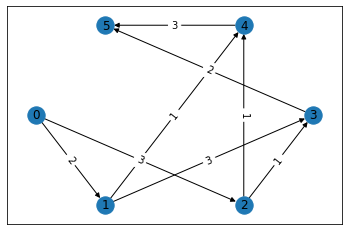

In [3]:
cms=scipy.sparse.csr_matrix(([2, 3, 3, 1, 1, 1, 2, 3],([0, 0, 1, 1, 2, 2, 3, 4],[1, 2, 3, 4, 3, 4, 5, 5])),shape=(6,6))
cm=nx.from_scipy_sparse_matrix(cms, create_using=nx.DiGraph)
labels = nx.get_edge_attributes(cm,'weight')
pos=nx.shell_layout(cm)
network=nx.draw_networkx(cm,pos)
nx.draw_networkx_edge_labels(cm,pos,edge_labels=labels)
plt.show()


{(0, 1): 2, (0, 2): 2, (1, 3): 1, (1, 4): 1, (2, 3): 1, (2, 4): 1, (3, 5): 2, (4, 5): 2}


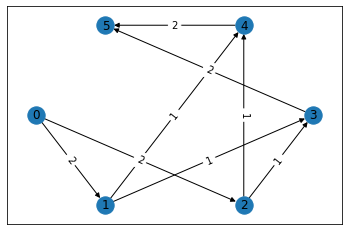

In [4]:
flow_value,flow_dict=nx.maximum_flow(cm,0,5,capacity='weight')
flow_sparse=dictconvert(flow_dict,6)
flow_graph=nx.from_scipy_sparse_matrix(flow_sparse, create_using=nx.DiGraph)
labels = nx.get_edge_attributes(flow_graph,'weight')
print(labels)
pos=nx.shell_layout(flow_graph)
network=nx.draw_networkx(flow_graph,pos)
nx.draw_networkx_edge_labels(flow_graph,pos,edge_labels=labels)
plt.show()